# HW 1 : Q1

In [ ]:
import pandas as pd
import numpy as np

inp_df_red=pd.read_csv("winequality-red.csv",delimiter=';')
inp_df_red['color']='red'
inp_df_red=inp_df_red.set_index('color')
inp_df_red.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
color,,,,,,,,,,,,
red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [ ]:
inp_df_white=pd.read_csv("winequality-white.csv",delimiter=';')
inp_df_white['color']='yellow'
inp_df_white=inp_df_white.set_index('color')
inp_df_white.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
color,,,,,,,,,,,,
yellow,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
yellow,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
yellow,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [ ]:
inp_df=pd.concat([inp_df_red, inp_df_white])
inp_df['citric acid']=1+inp_df['citric acid']
inp_df_red.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
color,,,,,,,,,,,,
red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [ ]:
inp_df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
color,,,,,,,,,,,,
red,7.4,0.70,1.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
red,7.8,0.88,1.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
red,7.8,0.76,1.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [ ]:
inp_df = inp_df.apply(lambda x: np.log10(x))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
inp_df_scaled=pd.DataFrame(scaler.fit_transform(inp_df.to_numpy()),columns=inp_df.columns,index=inp_df.index)
inp_df_scaled.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
color,,,,,,,,,,,,
red,0.240369,1.876072,-2.461304,-0.791963,0.959347,-1.171275,-1.452245,1.035635,1.771578,0.338472,-0.930853,-0.916425
red,0.560894,2.397336,-2.461304,-0.428719,1.549041,0.003936,-0.502721,0.702758,-0.091226,1.093834,-0.556448,-0.916425
red,0.560894,2.063397,-2.104518,-0.570703,1.402498,-0.727296,-0.804668,0.769360,0.283014,0.918293,-0.556448,-0.916425


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inp_df, [0]*len(inp_df), test_size=0.25, random_state=42)
len(X_train)

4872

In [ ]:
import keras
from keras import models,layers,optimizers

encoder=keras.models.Sequential([keras.layers.Dense(2,input_shape=[12], activation='linear')])
decoder=keras.models.Sequential([keras.layers.Dense(12,input_shape=[2], activation='linear')])

autoencoder=keras.models.Sequential([encoder,decoder])
autoencoder.compile(loss='mse',optimizer=optimizers.Adam(lr=0.0015,beta_1=0.95,beta_2=0.99))

Using TensorFlow backend.


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=3),
             ModelCheckpoint(filepath='HW5_Q1.h5', monitor='val_loss')]

history=autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=[X_test, X_test],callbacks=callbacks)


Train on 4872 samples, validate on 1625 samples
Epoch 1/100
4872/4872 [==============================] - 0s 84us/step - loss: 1.0737 - val_loss: 0.8451
Epoch 2/100
4872/4872 [==============================] - 0s 25us/step - loss: 0.7162 - val_loss: 0.5918
Epoch 3/100
4872/4872 [==============================] - 0s 25us/step - loss: 0.5137 - val_loss: 0.4257
Epoch 4/100
4872/4872 [==============================] - 0s 26us/step - loss: 0.3602 - val_loss: 0.2852
Epoch 5/100
4872/4872 [==============================] - 0s 30us/step - loss: 0.2289 - val_loss: 0.1679
Epoch 6/100
4872/4872 [==============================] - 0s 24us/step - loss: 0.1246 - val_loss: 0.0831
Epoch 7/100
4872/4872 [==============================] - 0s 27us/step - loss: 0.0597 - val_loss: 0.0413
Epoch 8/100
4872/4872 [==============================] - 0s 25us/step - loss: 0.0337 - val_loss: 0.0297
Epoch 9/100
4872/4872 [==============================] - 0s 25us/step - loss: 0.0282 - val_loss: 0.0281
Epoch 10/100
487

In [ ]:
import matplotlib.pyplot as plt

def plot_reconstructions(model):
    reconstructions=model.predict(X_test[:100])
    reconstruction_df=pd.DataFrame(reconstructions,columns=['pc 1','pc 2'],index=list(X_test[:100].index))
    plt.figure(figsize=(10,7))
    plt.scatter(reconstruction_df['pc 1'], reconstruction_df['pc 2'], c=list(reconstruction_df.index), alpha=0.8)
    plt.title("Plot of encoded wine data \n [Red wine shown in red and white wine shown in yellow]", fontsize=14)
    plt.xlabel('pc 1', fontsize=12)
    plt.ylabel('pc 2', fontsize=12)
    return reconstruction_df

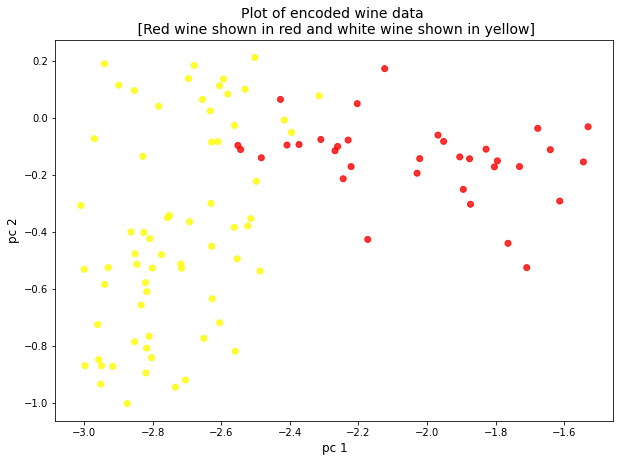

In [ ]:
reconstruction_df=plot_reconstructions(encoder)

In [ ]:
pd.DataFrame(autoencoder.predict(X_test[:2]),columns=X_test.columns)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.848658,-0.513884,0.121900,1.069771,-1.307217,1.516046,2.106854,-0.001997,0.496177,-0.300795,0.996010,0.754863
1,0.843267,-0.536018,0.115353,0.407780,-1.332918,1.407396,1.985171,-0.003127,0.504852,-0.289802,1.027227,0.761890


In [ ]:
X_test[:2]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
color,,,,,,,,,,,,
yellow,0.845098,-0.769551,0.240549,1.107210,-1.346787,1.380211,2.100371,-0.002526,0.513218,-0.420216,1.086360,0.90309
red,0.886491,-0.193820,0.082785,0.342423,-1.113509,1.505150,2.123852,-0.001915,0.514548,-0.346787,0.995635,0.69897


# HW 1 : Q2

In [ ]:
from keras.datasets import mnist
import numpy as np
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

In [ ]:
encoder_2=keras.models.Sequential([
keras.layers.Flatten(input_shape=[28,28,1]),
keras.layers.Dense(128, activation='selu'),
keras.layers.Dense(32, activation='selu'),
keras.layers.Dense(8, activation='selu'),
keras.layers.Dense(4, activation='selu'),
keras.layers.Dense(2, activation='selu')
])
decoder_2=keras.models.Sequential([
keras.layers.Dense(4,input_shape=[2], activation='selu'),
keras.layers.Dense(8, activation='sigmoid'),
keras.layers.Dense(32, activation='sigmoid'),
keras.layers.Dense(128, activation='sigmoid'),
keras.layers.Dense(28*28, activation='sigmoid'),
keras.layers.Reshape([28,28,1])
])

autoencoder_2=keras.models.Sequential([encoder_2,decoder_2])
autoencoder_2.compile(loss='mse',optimizer=optimizers.Adam(lr=0.0025,beta_1=0.97,beta_2=0.99))

In [ ]:
encoder_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 10        
Total params: 104,918
Trainable params: 104,918
Non-trainable params: 0
________________________________________________

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=3),
             ModelCheckpoint(filepath='HW5_Q2.h5', monitor='val_loss')]

history=autoencoder_2.fit(X_train, X_train,
                epochs=120,
                batch_size=256,
                shuffle=True,
                validation_data=[X_test, X_test],callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/120
60000/60000 [==============================] - 3s 43us/step - loss: 0.0730 - val_loss: 0.0676
Epoch 2/120
60000/60000 [==============================] - 2s 37us/step - loss: 0.0632 - val_loss: 0.0606
Epoch 3/120
60000/60000 [==============================] - 2s 37us/step - loss: 0.0597 - val_loss: 0.0585
Epoch 4/120
60000/60000 [==============================] - 2s 37us/step - loss: 0.0573 - val_loss: 0.0544
Epoch 5/120
60000/60000 [==============================] - 2s 37us/step - loss: 0.0531 - val_loss: 0.0519
Epoch 6/120
60000/60000 [==============================] - 2s 37us/step - loss: 0.0509 - val_loss: 0.0497
Epoch 7/120
60000/60000 [==============================] - 2s 38us/step - loss: 0.0492 - val_loss: 0.0485
Epoch 8/120
60000/60000 [==============================] - 2s 37us/step - loss: 0.0480 - val_loss: 0.0476
Epoch 9/120
60000/60000 [==============================] - 2s 37us/step - loss: 0.0467 - val_loss: 0.0

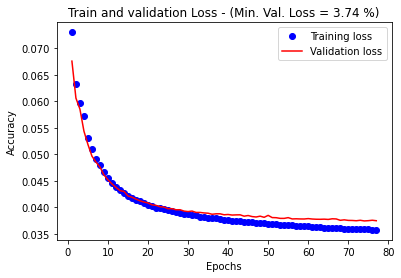

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)
plt.figure()
_=plt.plot(epochs, loss, 'bo', label='Training loss')
_=plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train and validation Loss - (Min. Val. Loss = '+str(round(min(val_loss)*100,2))+' %)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

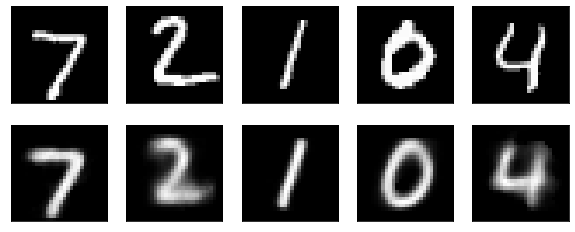

In [ ]:
# Keras blog used for this block: https://blog.keras.io/building-autoencoders-in-keras.html

encoded_imgs = encoder_2.predict(X_test)
decoded_imgs = decoder_2.predict(encoded_imgs)

import matplotlib.pyplot as plt
n=5
plt.figure(figsize=(10, 4))
for i in range(5):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## HW 5: Q3

In [33]:
stacked_encoder=keras.models.Sequential([
    keras.layers.Conv2D(16,(3,3),activation='selu',input_shape=[28,28,1],padding='same'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(12,(2,2),activation='selu',padding='same'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(8,(2,2),activation='selu',padding='same'),
    keras.layers.MaxPool2D((2,2))
])

In [34]:
stacked_encoder.summary()
#stacked_encoder.shape

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 12)        780       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 12)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 8)           392       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 8)           0         
Total params: 1,332
Trainable params: 1,332
Non-trainable params: 0
___________________________________________________

In [35]:
stacked_decoder=keras.models.Sequential([
    keras.layers.Conv2DTranspose(16,(3,3),strides=2,input_shape=[3,3,8], activation='selu',padding='valid'),
    keras.layers.Conv2DTranspose(12,(3,3),strides=2, activation='selu',padding='same'),
    keras.layers.Conv2DTranspose(12,(3,3),strides=1, activation='selu',padding='same'),
    keras.layers.Conv2DTranspose(1,(3,3),strides=2, activation='sigmoid',padding='same'),
    keras.layers.Reshape([28,28,1])
])

In [36]:
stacked_decoder.summary()
#stacked_decoder.shape

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_5 (Conv2DTr (None, 7, 7, 16)          1168      
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 14, 14, 12)        1740      
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 14, 14, 12)        1308      
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 28, 28, 1)         109       
_________________________________________________________________
reshape_3 (Reshape)          (None, 28, 28, 1)         0         
Total params: 4,325
Trainable params: 4,325
Non-trainable params: 0
_________________________________________________________________


In [37]:
conv_ae=keras.models.Sequential([stacked_encoder,stacked_decoder])
conv_ae.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.001,beta_1=0.95,beta_2=0.99))

In [38]:
from keras.datasets import mnist
import numpy as np
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [39]:
X_train.shape

(60000, 28, 28)

In [40]:
X_train = np.clip(X_train.astype('float32') / 255. + np.random.normal(loc=0.0,
scale=0.5, size=X_train.shape),0.,1.)
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

In [41]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=3),
             ModelCheckpoint(filepath='HW5_Q1.h5', monitor='val_loss')]

history=conv_ae.fit(X_train, X_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=[X_test, X_test],callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 134us/step - loss: 0.5542 - val_loss: 0.2943
Epoch 2/100
60000/60000 [==============================] - 7s 125us/step - loss: 0.5271 - val_loss: 0.2607
Epoch 3/100
60000/60000 [==============================] - 7s 124us/step - loss: 0.5229 - val_loss: 0.2423
Epoch 4/100
60000/60000 [==============================] - 8s 125us/step - loss: 0.5210 - val_loss: 0.2368
Epoch 5/100
60000/60000 [==============================] - 8s 128us/step - loss: 0.5197 - val_loss: 0.2281
Epoch 6/100
60000/60000 [==============================] - 8s 125us/step - loss: 0.5188 - val_loss: 0.2217
Epoch 7/100
60000/60000 [==============================] - 7s 125us/step - loss: 0.5181 - val_loss: 0.2212
Epoch 8/100
60000/60000 [==============================] - 7s 125us/step - loss: 0.5175 - val_loss: 0.2196
Epoch 9/100
60000/60000 [==============================] - 8s 125us/step - loss: 0.5171 - val_

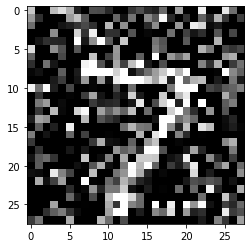

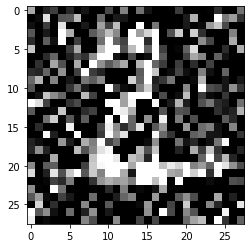

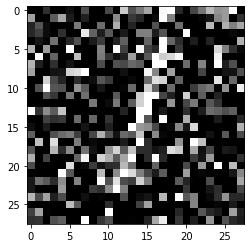

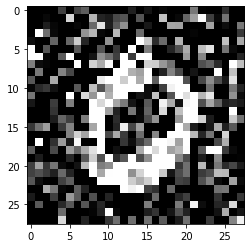

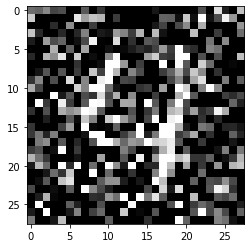

In [42]:
for i in range(5):
    plt.imshow(np.clip(X_test[i].reshape(28, 28)+np.random.normal(loc=0.0,scale=0.5,size=(28, 28)),0.,1.))
    plt.show()

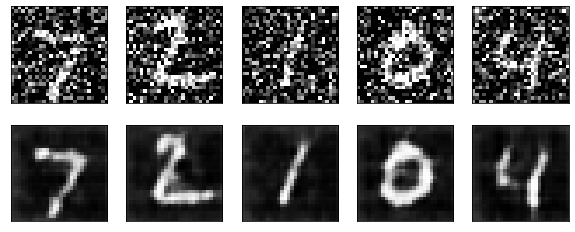

In [43]:
# Keras blog used for this block: https://blog.keras.io/building-autoencoders-in-keras.html

encoded_imgs = stacked_encoder.predict(X_test)
decoded_imgs = stacked_decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt
n=5
plt.figure(figsize=(10, 4))
for i in range(5):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(np.clip(X_test[i].reshape(28, 28)+np.random.normal(loc=0.0,scale=0.5,size=(28, 28)),0.,1.))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [44]:
X_train[0].shape

(28, 28, 1)